In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
df = pd.read_csv("Combined_Data.csv")

In [11]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [12]:
df.isnull().sum()

Unnamed: 0      0
statement     362
status          0
dtype: int64

In [13]:
df.shape

(53043, 3)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.count

<bound method DataFrame.count of        Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [17]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [18]:
df = df.drop(columns=['Unnamed: 0'])

In [19]:
df.reset_index(drop=True, inplace=True)

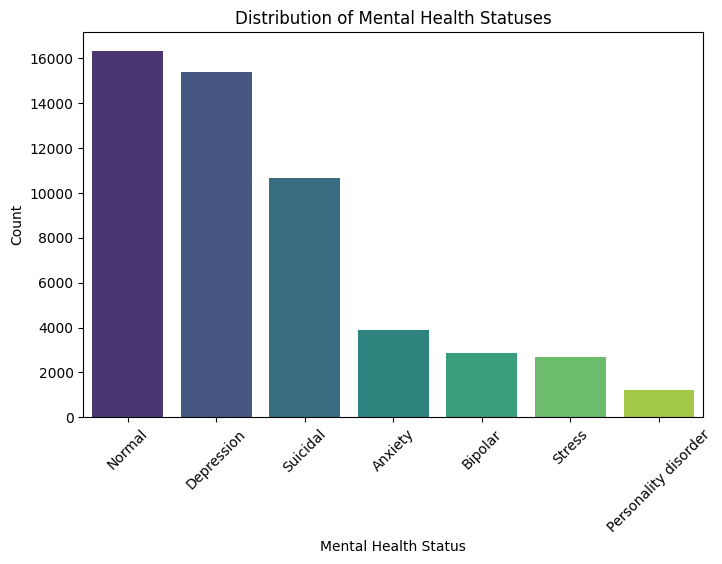

In [20]:
# 1. Distribution of Mental Health Statuses
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')
plt.title("Distribution of Mental Health Statuses")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

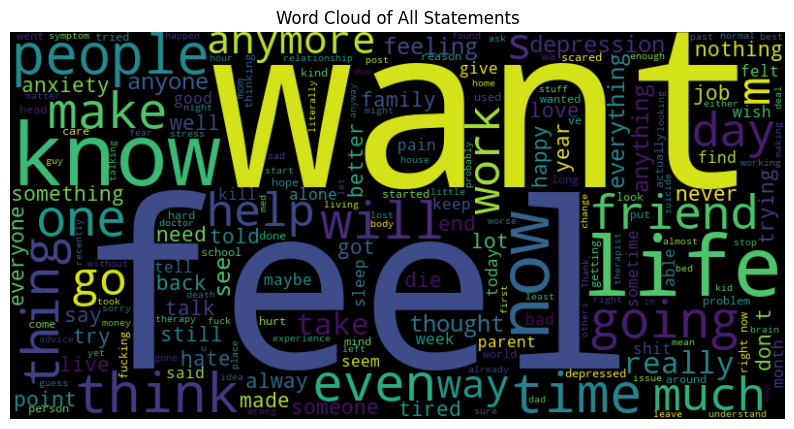

In [21]:
# 2. Word Cloud for the Most Frequent Words in Statements
all_text = " ".join(statement for statement in df['statement'].astype(str))

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="viridis").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of All Statements")
plt.axis("off")
plt.show()

In [22]:
df['text_length'] = df['statement'].astype(str).apply(len)

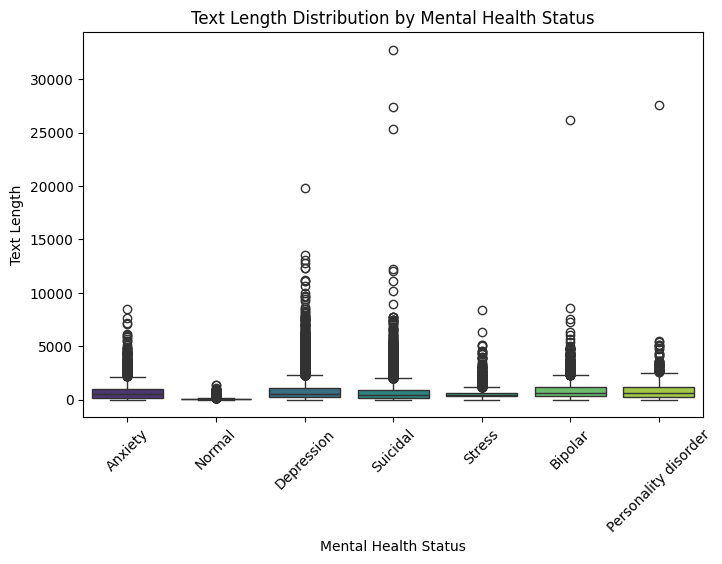

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='status', y='text_length', palette='viridis')
plt.title("Text Length Distribution by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


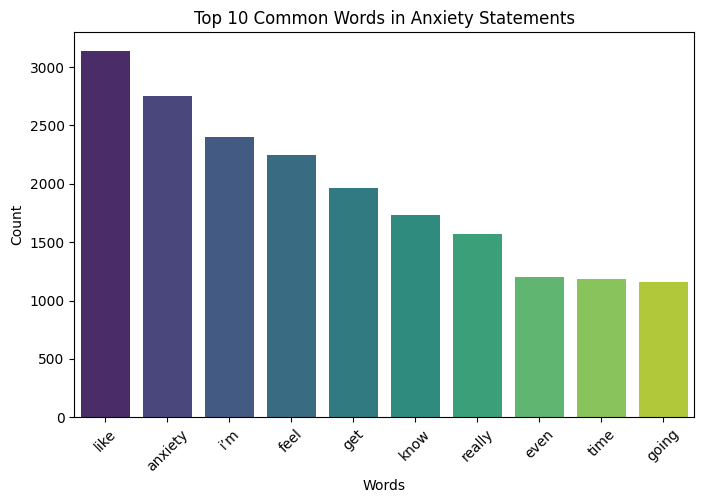

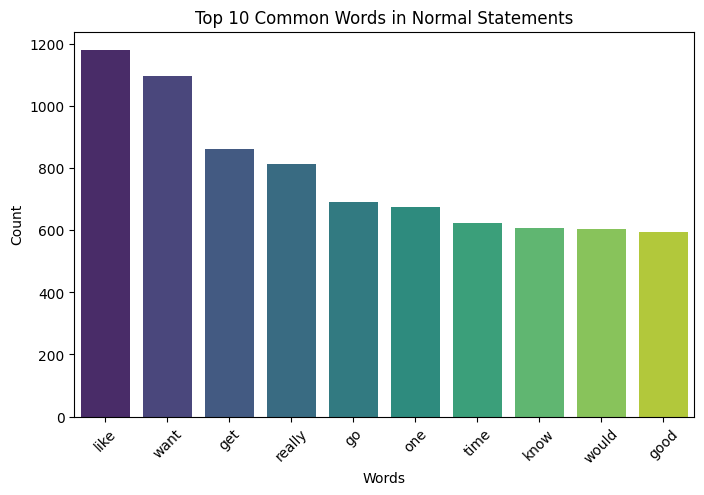

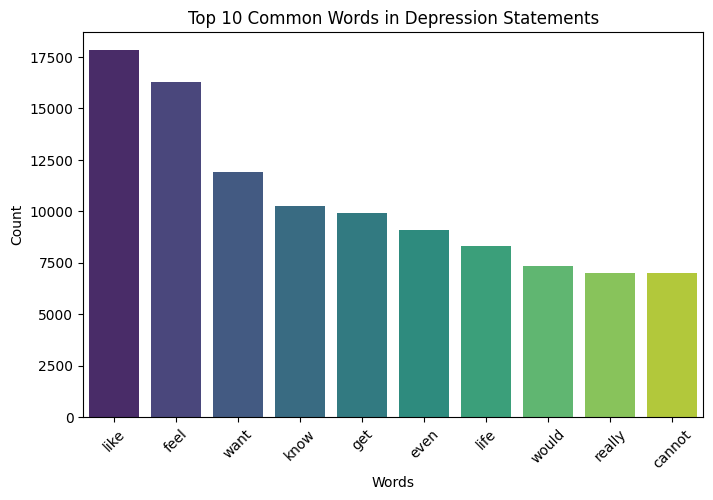

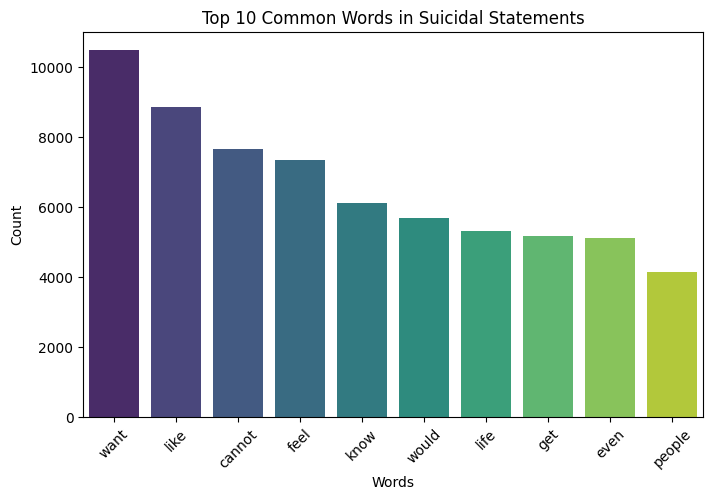

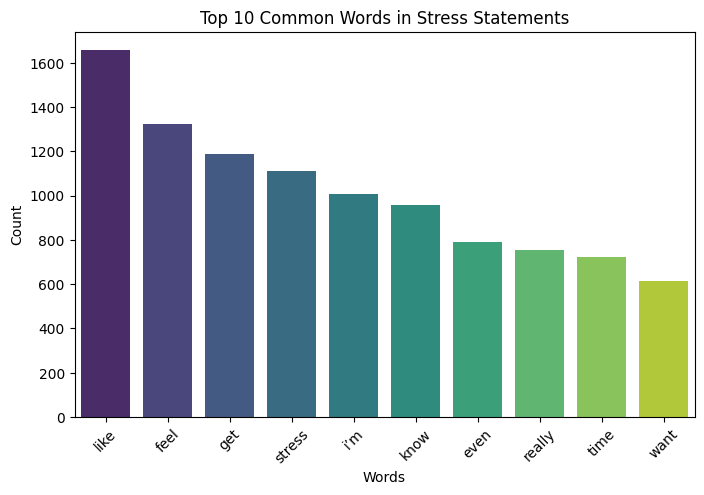

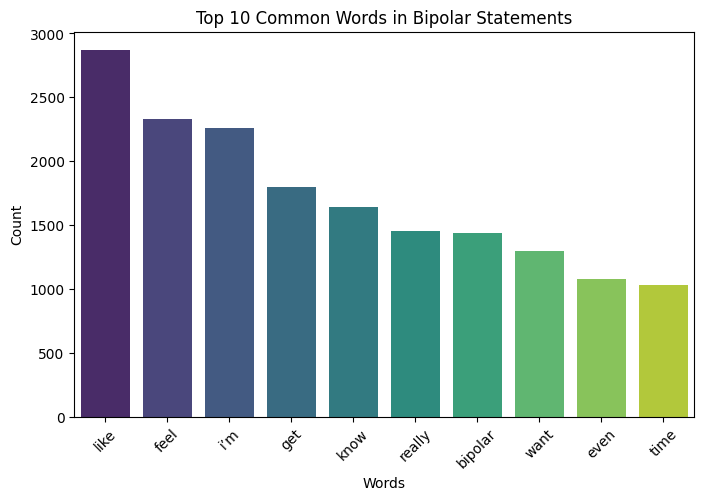

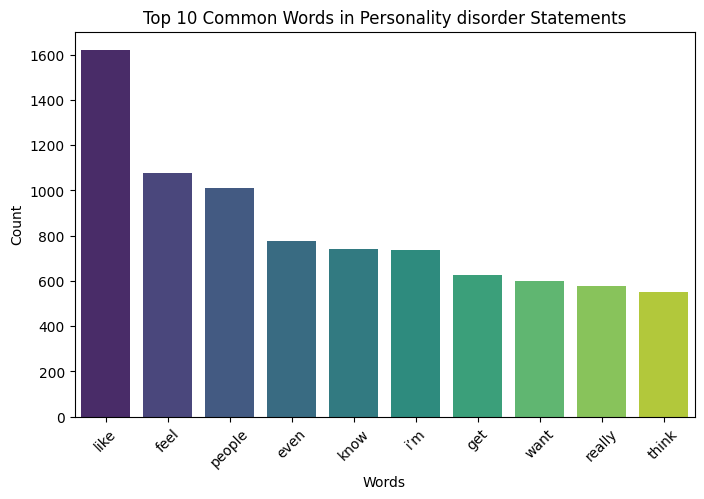

In [25]:
# 4. Most Common Words in Each Status
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def most_common_words(text):
    words = text.lower().split()
    words = [word for word in words if word not in stopwords.words('english')]
    word_counts = Counter(words)
    return word_counts.most_common(10)

for status in df['status'].unique():
    status_text = " ".join(df[df['status'] == status]['statement'].astype(str))
    common_words = most_common_words(status_text)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title(f"Top 10 Common Words in {status} Statements")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

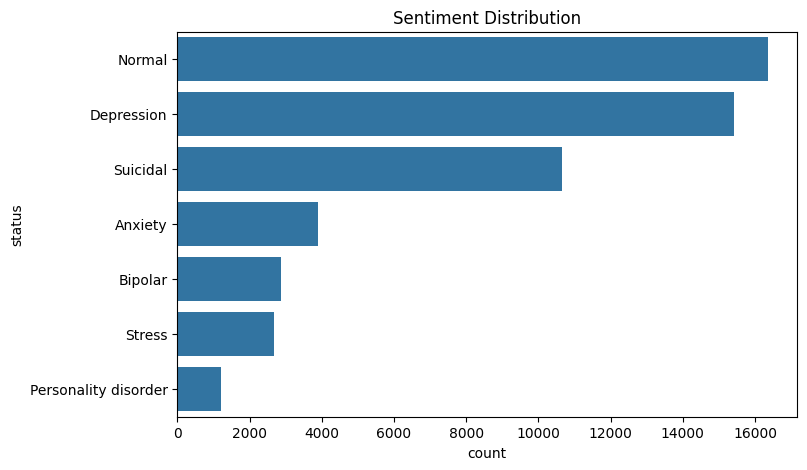

In [26]:
plt.figure(figsize=(8,5)) #to adjust figure size
sns.countplot(y=df["status"], order=df["status"].value_counts().index) #Counter plot, y axis as sentiments with descending order 
plt.title("Sentiment Distribution")
plt.show()

In [27]:
df = df.dropna(subset=['statement'])

In [28]:
print("Missing values before dropping:", df['statement'].isnull().sum())

Missing values before dropping: 0


In [29]:
# Verify the change
print("Missing values after dropping:", df['statement'].isnull().sum())
print("Shape after dropping missing values:", df.shape)

Missing values after dropping: 0
Shape after dropping missing values: (52681, 3)


In [30]:
import re
import string

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

df['statement'] = df['statement'].astype(str).apply(clean_text)

In [31]:
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [32]:
X = df['statement']
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [34]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [35]:
y_pred_train = model.predict(X_train_tfidf)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Training Accuracy: 0.7098044798785118
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      3086
           1       0.90      0.51      0.65      2250
           2       0.57      0.83      0.67     12388
           3       0.84      0.84      0.84     13035
           4       0.96      0.11      0.20       840
           5       0.91      0.16      0.27      2051
           6       0.75      0.61      0.67      8494

    accuracy                           0.71     42144
   macro avg       0.82      0.53      0.57     42144
weighted avg       0.75      0.71      0.70     42144



In [36]:
y_pred = model.predict(X_test_tfidf)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6655594571509917
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       755
           1       0.86      0.46      0.60       527
           2       0.51      0.80      0.62      3016
           3       0.83      0.80      0.81      3308
           4       0.94      0.07      0.13       237
           5       0.84      0.13      0.22       536
           6       0.70      0.54      0.61      2158

    accuracy                           0.67     10537
   macro avg       0.78      0.49      0.53     10537
weighted avg       0.71      0.67      0.65     10537



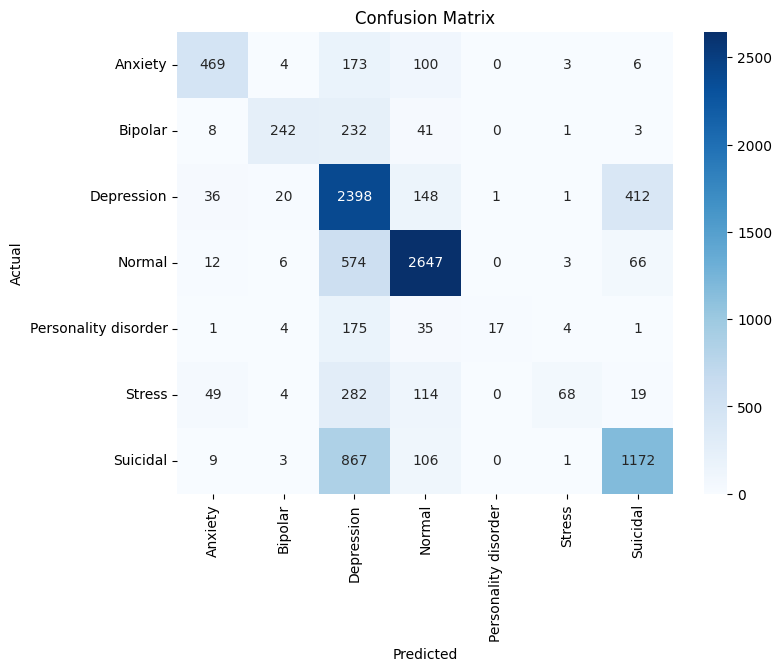

In [37]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
import pickle

pickle.dump(model, open("mental_health_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

In [39]:
loaded_model = pickle.load(open("mental_health_model.pkl", "rb"))
loaded_tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

In [50]:
sample = (input("Enter Your Caption"))
sample_text = [sample] 
sample_tfidf = loaded_tfidf.transform(sample_text)
prediction = loaded_model.predict(sample_tfidf)
print("Predicted Status:", label_encoder.inverse_transform(prediction))

Predicted Status: ['Depression']
